# Logistic Regression

The logistic regression hypothesis is defined as:

$h_\theta(x) = p(x) = g(\theta^Tx)$ where $g$ is the sigmoid function $ g(z) = \frac{1}{1+e^{-z}} $

$g$ models the relationship between $p(x) = Pr(y=1|x)$ and $x$. As you can see, the equation relating the two variables is clearly non linear (it has to be like that as we want $g$ to follow the constraints of a Cumulative Distribution Function, i.e. with outputs constrained between 0 and 1 and with an inflection point at 0.5). It is interesting to notice that logistic regression is by definition a linear model. In what is it actually linear?

Turns out that one can show the following:

$log(\frac{p(x)}{1 - p(x)}) = \theta^Tx$

The quantity $\frac{p(x)}{1 - p(x)}$ is called the $odds$. The previous manipulation shows that the logistic regression model has a logit (log-odds) which is linear in $x$.

The coefficients $\theta$ are unknown and must be estimated based on the available training data. In the linear regression context we used the least squares approach, minimizing $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $. Within the logistic regression framework we need to do the same but we actually can't use the identical cost function definition as before, due to it not being convex (i.e. it would have many local minima). Hence we turn to the more general $maximum$ $likelihood$ method. This is the basic intuition behind it: we seek estimates for $\theta$ such that the predicted probability $p(x)$ of success (assuming a binary classification problem) for each observation, corresponds as closely as possible to the observation’s actual status (success/failure). In other words, we try to find $\theta$ such that plugging
these estimates into the model for $p(x)$, yields a number close to one for all individuals who successed, and a number close to zero for all individuals who did not. This intuition can be formalized using a mathematical equation called a likelihood function (which we need to maximize):

$l(\theta) = \prod_{i:y_1=1}p(x_i) \prod_{i:y_1=0}(1-p(x_i)) $

Computing the negative log of the whole equation and rearranging the terms leads us to the final cost function for the logistic regression model (which we now need to minimize):

$J(\theta) = \frac{1}{m}\sum_{i=1}^m(-y_i log(h_i(\theta)) - (1-y_i)log(1-h_i(\theta)))$

At the end of the day we want to find $\theta$ so that $J(\theta)$ is minimized, or putting it differently its gradient is 0, where the gradient of the cost function with respect to $\theta$ is equal to

$\nabla_{\theta} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$ 

basically identical to the linear regression one, just with a different $h_{\theta}$

## Problem definition 

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

In [382]:
import numpy as np
import pandas as pd
import seaborn as sns

students_exams = pd.read_csv('C:\\Users\\pochetti\Machine_Learning\\mlclass-ex2-005\\mlclass-ex2\ex2data1.txt', 
                            header=None,
                            names=['FirstExamScore', 'SecondExamScore', 'Results'])
students_exams['Admission'] = np.where(students_exams.Results==0, 'Not Admitted', 'Admitted')

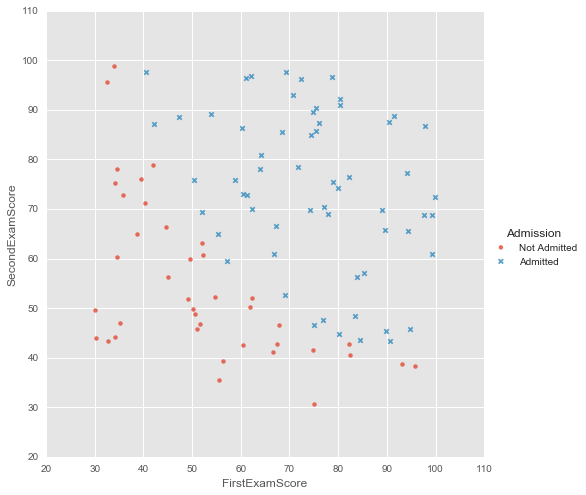

In [383]:
g = sns.lmplot("FirstExamScore", "SecondExamScore", hue="Admission", 
               data=students_exams, markers=["o", "x"], fit_reg=False, size=7)

### Functions

In [392]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def computeCost(theta, X, y):
    m = y.shape[0]
    h_theta = sigmoid(X.dot(theta))

    cost = 1/m * (np.dot(np.log(h_theta).T, -y) + np.dot(np.log(1-h_theta).T, -(1-y))) 
    
    if np.isnan(cost):
        return np.inf
    
    return cost

def computeGradient(theta, X, y):
    theta = theta.reshape(-1, 1)
    m = y.shape[0]
    h_theta = sigmoid(X.dot(theta))
    
    gradient = 1/m * np.dot(X.T, h_theta - y)
    return gradient.flatten()

def plotDecisionBoundary(X, theta):
    plotx = np.array([min(X[:,1])-2, max(X[:,1])+2])
    ploty = -(theta[1] * plotx + theta[0])/theta[2]
    
    return plotx, ploty

def predict(X, theta):
    prob = sigmoid(X.dot(theta))
    p = np.where(prob < 0.5, 0, 1)
    
    return p.reshape(-1, 1)

### Running the Model

In [385]:
data = np.loadtxt('C:\\Users\\pochetti\Machine_Learning\\mlclass-ex2-005\\mlclass-ex2\ex2data1.txt', delimiter=',')
X = data[:,0:2]
y = data[:,2]
y = y.reshape(y.shape[0], 1)
X = np.c_[np.ones(X.shape[0]), X] # adding column of ones to X to account for theta_0 (the intercept)
initial_theta = np.zeros((X.shape[1], 1))

from scipy import optimize
theta = optimize.fmin_bfgs(f=computeCost, x0=initial_theta, args=(X, y), fprime=computeGradient)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 28
         Gradient evaluations: 28


### Plotting Results

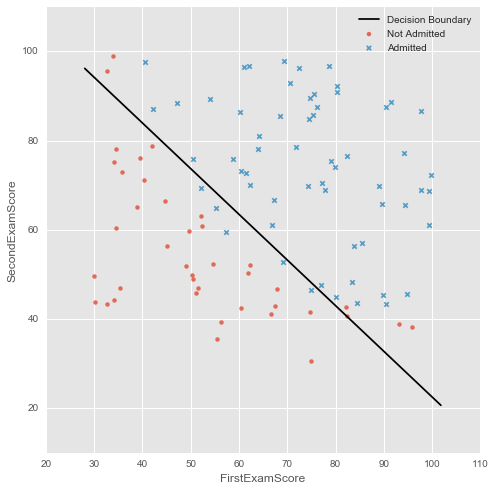

In [386]:
plotx, ploty= plotDecisionBoundary(X, theta)
g = sns.lmplot("FirstExamScore", "SecondExamScore", hue="Admission", 
               data=students_exams, markers=["o", "x"], fit_reg=False, size=7, legend=False)
ax = g.ax
ax.plot(plotx, ploty, color='k', label='Decision Boundary')
legend = ax.legend(loc=1, shadow=True)
plt.show()

### Calculating Model Accuracy

In [398]:
print('Model Accuracy: ',  ((y == predict(X, theta)).sum()/y.shape[0]) * 100, '%')

Model Accuracy:  89.0 %
